In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from matplotlib import pyplot as plt
import re
from IPython.display import Image

plt.style.use('fivethirtyeight')

In [ ]:
REVIEWS_URL = 'https://ids-storage-football-prediction.s3-eu-west-1.amazonaws.com/data_mmwd/reviews.csv'
REVIEWS_AND_POLARITY_URL = 'https://ids-storage-football-prediction.s3-eu-west-1.amazonaws.com/data_mmwd/reviews_en_polarity.csv'
CALENDAR_URL = 'https://ids-storage-football-prediction.s3-eu-west-1.amazonaws.com/data_mmwd/calendar.csv'
LISTINGS_URL = 'https://ids-storage-football-prediction.s3-eu-west-1.amazonaws.com/data_mmwd/listings.csv'

In [ ]:
listings = pd.read_csv(LISTINGS_URL)
reviews = pd.read_csv(REVIEWS_URL)

In [ ]:
listings.head(3)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,34220,https://www.airbnb.com/rooms/34220,20201021220716,2020-10-23,Room available,<b>The space</b><br />This room is part of a t...,NaN,https://a0.muscache.com/pictures/192935/3bf5a8...,147438,https://www.airbnb.com/users/show/147438,Mark,2010-06-18,CA,NaN,NaN,NaN,NaN,f,https://a0.muscache.com/defaults/user_pic-50x5...,https://a0.muscache.com/defaults/user_pic-225x...,NaN,1,1,[],f,f,NaN,Capital,NaN,45.40924,-75.67900,Private room in apartment,Private room,2,NaN,1 bath,1.0,1.0,"[""Wifi"", ""Heating"", ""Free parking on premises""...",$202.00,7,31,7,7,31,31,7.0,31.0,NaN,t,1,1,1,1,2020-10-23,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
1,36642,https://www.airbnb.com/rooms/36642,20201021220716,2020-10-22,City Conveniences A Country Setting,<b>The space</b><br />Are you planning a vacat...,NaN,https://a0.muscache.com/pictures/7542487/52136...,157787,https://www.airbnb.com/users/show/157787,Donna,2010-07-04,"Ottawa, Ontario, Canada",I am originally from Nova Scotia but I have li...,NaN,NaN,100%,f,https://a0.muscache.com/im/users/157787/profil...,https://a0.muscache.com/im/users/157787/profil...,NaN,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,NaN,Kitchissippi,NaN,45.40159,-75.74679,Private room in house,Private room,2,NaN,2 baths,1.0,1.0,"[""Essentials"", ""Hot water"", ""Dryer"", ""Extra pi...",$65.00,3,14,3,3,14,14,3.0,14.0,NaN,t,29,59,89,364,2020-10-22,87,1,0,2010-07-11,2020-02-17,94.0,10.0,10.0,10.0,10.0,10.0,9.0,NaN,f,1,0,1,0,0.69
2,59258,https://www.airbnb.com/rooms/59258,20201021220716,2020-10-22,Lower level of my house to rent,"Lower 1/2 of bungalow, a separate entrance, 10...",NaN,https://a0.muscache.com/pictures/359337/5d90d6...,284351,https://www.airbnb.com/users/show/284351,Elena,2010-11-11,"Ottawa, Ontario, Canada",Canada rocks!,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/284351/profil...,https://a0.muscache.com/im/users/284351/profil...,NaN,1,1,"['email', 'phone', 'reviews', 'offline_governm...",t,t,NaN,Bay,NaN,45.35900,-75.80314,Entire apartment,Entire home/apt,4,NaN,1 bath,1.0,1.0,"[""Wifi"", ""Washer"", ""Dryer"", ""Heating"", ""Free p...",$200.00,3,730,3,3,730,730,3.0,730.0,NaN,t,0,0,0,0,2020-10-22,1,0,0,2011-07-04,2011-07-04,100.0,10.0,8.0,10.0,10.0,10.0,10.0,NaN,f,1,1,0,0,0.01


In [ ]:
listings.shape

(2613, 74)

In [ ]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2613 entries, 0 to 2612
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            2613 non-null   int64  
 1   listing_url                                   2613 non-null   object 
 2   scrape_id                                     2613 non-null   int64  
 3   last_scraped                                  2613 non-null   object 
 4   name                                          2613 non-null   object 
 5   description                                   2523 non-null   object 
 6   neighborhood_overview                         1800 non-null   object 
 7   picture_url                                   2613 non-null   object 
 8   host_id                                       2613 non-null   int64  
 9   host_url                                      2613 non-null   o

In [ ]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,36642,63694,2010-07-11,126491,Robert,I gave Donna 4 stars only because she is new t...
1,36642,92464,2010-09-07,204008,Eduardo,Donna is a nice and pleasant person. We enjoye...
2,36642,100164,2010-09-19,164372,Asha,"Our trip was too short in Ottawa, we really wi..."
3,36642,262662,2011-05-14,414166,Emie,Donna is a nice person. I had a short stay at ...
4,36642,266613,2011-05-16,562356,Deepak,Our stay at Donna's home was very pleasant. Sh...


In [ ]:
reviews.shape

(99694, 6)

In [ ]:
listings.loc[listings['id'] == 45796523]

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
2587,45796523,https://www.airbnb.com/rooms/45796523,20201021220716,2020-10-23,"Budget bedroom, downtown Ottawa",You get your own private bedroom in my downtow...,"The apartment is right downtown, in a neighbor...",https://a0.muscache.com/pictures/f11eb5b3-c0fc...,371266353,https://www.airbnb.com/users/show/371266353,Francis,2020-10-09,CA,NaN,within an hour,100%,90%,f,https://a0.muscache.com/im/pictures/user/61ea0...,https://a0.muscache.com/im/pictures/user/61ea0...,Centretown,1,1,"['email', 'phone']",t,f,"Ottawa, Ontario, Canada",Somerset,NaN,45.4158,-75.69869,Private room in apartment,Private room,2,NaN,1 shared bath,1.0,1.0,"[""Wifi"", ""Hair dryer"", ""Iron"", ""Essentials"", ""...",$49.00,1,1125,1,1,1125,1125,1.0,1125.0,NaN,t,0,0,0,0,2020-10-23,2,2,2,2020-10-14,2020-10-18,100.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,t,1,0,1,0,2.0


In [ ]:
reviews['comments'][4574]

'Very clean and amazing location!'

In [ ]:
#@title Wybierz komentarz:

idx = 5301 #@param {type:'slider', min:0, max:99693}
reviews['comments'][idx]

'A very nice host and a very nice house!'

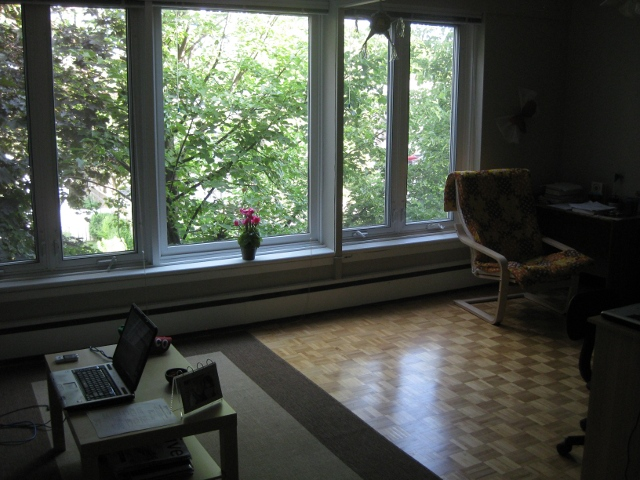

In [ ]:
#@title Wybierz zdjęcie:

idx = 0 #@param {type:'slider', min:0, max:99693}
Image(listings['picture_url'][idx])

In [ ]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [ ]:
listings = listings.drop(['picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90', 'availability_365', 'calendar_last_scraped', 'license', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'neighborhood_overview', 'bathrooms',
       'first_review',
       'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'reviews_per_month'
       ], axis=1)

In [ ]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,description,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d
0,34220,https://www.airbnb.com/rooms/34220,20201021220716,2020-10-23,Room available,<b>The space</b><br />This room is part of a t...,45.40924,-75.67900,Private room in apartment,Private room,2,1 bath,1.0,1.0,"[""Wifi"", ""Heating"", ""Free parking on premises""...",$202.00,0,0,0
1,36642,https://www.airbnb.com/rooms/36642,20201021220716,2020-10-22,City Conveniences A Country Setting,<b>The space</b><br />Are you planning a vacat...,45.40159,-75.74679,Private room in house,Private room,2,2 baths,1.0,1.0,"[""Essentials"", ""Hot water"", ""Dryer"", ""Extra pi...",$65.00,87,1,0
2,59258,https://www.airbnb.com/rooms/59258,20201021220716,2020-10-22,Lower level of my house to rent,"Lower 1/2 of bungalow, a separate entrance, 10...",45.35900,-75.80314,Entire apartment,Entire home/apt,4,1 bath,1.0,1.0,"[""Wifi"", ""Washer"", ""Dryer"", ""Heating"", ""Free p...",$200.00,1,0,0
3,158824,https://www.airbnb.com/rooms/158824,20201021220716,2020-10-23,DOWNTOWN/GLEBE HOUSE WITH BACKYARD,Big 3 bedroom house with backyard in desirable...,45.40248,-75.69941,Entire house,Entire home/apt,3,1 bath,2.0,2.0,"[""Wifi"", ""Essentials"", ""Smoke alarm"", ""Washer""...",$140.00,7,0,0
4,261065,https://www.airbnb.com/rooms/261065,20201021220716,2020-10-23,Westboro Village Executive Suite,A tastefully decorated and well equipped upper...,45.38972,-75.75496,Entire apartment,Entire home/apt,4,1 bath,1.0,1.0,"[""Essentials"", ""Hot water"", ""Dryer"", ""Stove"", ...",$150.00,64,6,1


In [ ]:
listings['last_scraped'] = pd.to_datetime(listings['last_scraped'])

In [ ]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2613 entries, 0 to 2612
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      2613 non-null   int64         
 1   listing_url             2613 non-null   object        
 2   scrape_id               2613 non-null   int64         
 3   last_scraped            2613 non-null   datetime64[ns]
 4   name                    2613 non-null   object        
 5   description             2523 non-null   object        
 6   latitude                2613 non-null   float64       
 7   longitude               2613 non-null   float64       
 8   property_type           2613 non-null   object        
 9   room_type               2613 non-null   object        
 10  accommodates            2613 non-null   int64         
 11  bathrooms_text          2610 non-null   object        
 12  bedrooms                2413 non-null   float64 

In [ ]:
listings.dropna(inplace=True)

In [ ]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2328 entries, 0 to 2612
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      2328 non-null   int64         
 1   listing_url             2328 non-null   object        
 2   scrape_id               2328 non-null   int64         
 3   last_scraped            2328 non-null   datetime64[ns]
 4   name                    2328 non-null   object        
 5   description             2328 non-null   object        
 6   latitude                2328 non-null   float64       
 7   longitude               2328 non-null   float64       
 8   property_type           2328 non-null   object        
 9   room_type               2328 non-null   object        
 10  accommodates            2328 non-null   int64         
 11  bathrooms_text          2328 non-null   object        
 12  bedrooms                2328 non-null   float64 

In [ ]:
listings.shape

(2328, 19)